In [39]:
# DATA LOADING

from mobility_data_loader import mobility_data_loader

# Process whole dataset into intermediate form
dataframe = mobility_data_loader('20240101','20240131')

1
20240101 dataframe shape
(85653, 18)
2
20240102 dataframe shape
(84857, 18)
3
20240103 dataframe shape
(85335, 18)
4
20240104 dataframe shape
(101273, 18)
5
20240105 dataframe shape
(113529, 18)
6
20240106 dataframe shape
(104928, 18)
7
20240107 dataframe shape
(94203, 18)
8
20240108 dataframe shape
(91534, 18)
9
20240109 dataframe shape
(115631, 18)
10
20240110 dataframe shape
(115583, 18)
11
20240111 dataframe shape
(117350, 18)
12
20240112 dataframe shape
(119567, 18)
13
20240113 dataframe shape
(106789, 18)
14
20240114 dataframe shape
(99355, 18)
15
20240115 dataframe shape
(114665, 18)
16
20240116 dataframe shape
(115293, 18)
17
20240117 dataframe shape
(119302, 18)
18
20240118 dataframe shape
(115119, 18)
19
20240119 dataframe shape
(122319, 18)
20
20240120 dataframe shape
(110519, 18)
21
20240121 dataframe shape
(95166, 18)
22
20240122 dataframe shape
(117317, 18)
23
20240123 dataframe shape
(114325, 18)
24
20240124 dataframe shape
(111372, 18)
25
20240125 dataframe shape
(114

In [40]:
for date, df in dataframe.items():
    print(date,df.shape)

20240101 (85653, 18)
20240102 (84857, 18)
20240103 (85335, 18)
20240104 (101273, 18)
20240105 (113529, 18)
20240106 (104928, 18)
20240107 (94203, 18)
20240108 (91534, 18)
20240109 (115631, 18)
20240110 (115583, 18)
20240111 (117350, 18)
20240112 (119567, 18)
20240113 (106789, 18)
20240114 (99355, 18)
20240115 (114665, 18)
20240116 (115293, 18)
20240117 (119302, 18)
20240118 (115119, 18)
20240119 (122319, 18)
20240120 (110519, 18)
20240121 (95166, 18)
20240122 (117317, 18)
20240123 (114325, 18)
20240124 (111372, 18)
20240125 (114876, 18)
20240126 (121748, 18)
20240127 (113147, 18)
20240128 (99002, 18)
20240129 (117013, 18)
20240130 (118667, 18)
20240131 (117670, 18)


In [56]:
import pandas as pd

# Read Tourists List
tourist_dataframe = pd.read_csv('E:\\IRP_noto_earthquake\\data\\processed\\tourists_common_ids.csv')

In [57]:
tourist_return_record = tourist_dataframe

In [58]:
tourist_return_record['returned'] = False
tourist_return_record['returnedOn'] = pd.NaT
tourist_return_record.head()

,common_id,returned,returnedOn
0,f0edd6b6f8212254055afccab3e01e7a,False,NaT
1,792a4f51-2d56-4aae-928c-2952d820a9b9,False,NaT
2,ef0b4dd70578af454b85241236309c86,False,NaT
3,62814c206e61f36f31cc5c7655c188d3,False,NaT
4,a3ef6efaef7fe36a18ce6bf105420d2c,False,NaT


In [73]:
tourist_return_record.shape

(423, 3)

In [59]:
from ishikawa_region_mapper import ishikawa_region_mapper
map, jpn_adm2 = ishikawa_region_mapper()

In [60]:
# Before earthquake happened, if left the region or destination was outside
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

def did_leave_the_region(df, jpn_adm2):
    
    # Convert DataFrame to GeoDataFrame with Points geometry
    geometry_destination = [Point(xy) for xy in zip(df['longitude_d'], df['latitude_d'])]
    gdf_destination = gpd.GeoDataFrame(df, geometry=geometry_destination, crs='EPSG:4326')

    # Spatial join with GeoJSON shapefile to find points within the shapefile
    gdf_destination_within_shape = gpd.sjoin(gdf_destination, jpn_adm2, op='within', how='inner')

    # Identify indices of points that are within the shapefile
    indices_within = gdf_destination_within_shape.index

    # Filter the original DataFrame to keep only rows with destination outside the shapefile
    filtered_df = df[~df.index.isin(indices_within)]

    return filtered_df

In [61]:
import pandas as pd

for date, df in dataframe.items():
    print(date)
    
    # Check if everyone returned
    all_returned_true = tourist_return_record['returned'].all()
    # print(all_returned_true)
    if all_returned_true:
        break

    # # Keep travels for only tourists
    df = df[df['common_id'].isin(tourist_return_record[tourist_return_record['returned'] == False]['common_id'])]
    print(df.shape)
    
    # If tourists did not travel on the current day
    if df.empty:
        print('no travel')
        continue

    # # Get tourists who left
    df_tourist_left_on_current_day = did_leave_the_region(df, jpn_adm2)
    # print(df_tourist_left_on_current_day.shape)

    # Keep only the 'common_id' column and ensure unique values
    df_tourist_left_on_current_day = df_tourist_left_on_current_day[['common_id']].drop_duplicates()
    # print(df_tourist_left_on_current_day.shape)

    # # Set returned to True and set the date on record dataframe
    tourist_return_record.loc[tourist_return_record['common_id'].isin(df_tourist_left_on_current_day['common_id']), 'returned'] = True
    tourist_return_record.loc[tourist_return_record['common_id'].isin(df_tourist_left_on_current_day['common_id']), 'returnedOn'] = pd.to_datetime(date)

    # Count the number of rows where returned is True
    count_returned_true = tourist_return_record['returned'].sum()

    print("Number of tourists who returned:", count_returned_true)

20240101
(1228, 18)
Number of tourists who returned: 186
20240102
(591, 18)


e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


Number of tourists who returned: 278
20240103
(295, 18)
Number of tourists who returned: 336
20240104
(161, 18)
Number of tourists who returned: 364
20240105


e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


(104, 18)
Number of tourists who returned: 382
20240106
(67, 18)
Number of tourists who returned: 393
20240107


e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


(54, 18)
Number of tourists who returned: 399
20240108
(40, 18)
Number of tourists who returned: 401
20240109


e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


(45, 18)
Number of tourists who returned: 402
20240110
(46, 18)
Number of tourists who returned: 409
20240111


e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


(37, 18)
Number of tourists who returned: 412
20240112
(30, 18)
Number of tourists who returned: 413
20240113


e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


(18, 18)
Number of tourists who returned: 414
20240114
(21, 18)
Number of tourists who returned: 415
20240115
(16, 18)
Number of tourists who returned: 416
20240116


e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


(22, 18)
Number of tourists who returned: 417
20240117
(15, 18)
Number of tourists who returned: 419
20240118
(5, 18)
Number of tourists who returned: 419
20240119


e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


(9, 18)
Number of tourists who returned: 420
20240120
(0, 18)
no travel
20240121
(0, 18)
no travel
20240122
(0, 18)
no travel
20240123
(0, 18)
no travel
20240124


e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


(0, 18)
no travel
20240125
(0, 18)
no travel
20240126
(2, 18)
Number of tourists who returned: 420
20240127
(1, 18)
Number of tourists who returned: 420
20240128
(0, 18)
no travel
20240129
(2, 18)
Number of tourists who returned: 420
20240130
(2, 18)
Number of tourists who returned: 420
20240131
(0, 18)
no travel


e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please

In [62]:
tourist_return_record.head()

,common_id,returned,returnedOn
0,f0edd6b6f8212254055afccab3e01e7a,True,2024-01-02
1,792a4f51-2d56-4aae-928c-2952d820a9b9,True,2024-01-01
2,ef0b4dd70578af454b85241236309c86,True,2024-01-02
3,62814c206e61f36f31cc5c7655c188d3,True,2024-01-02
4,a3ef6efaef7fe36a18ce6bf105420d2c,True,2024-01-19


In [63]:
# Filter out NaT (Not a Time) values
df_filtered = tourist_return_record.dropna(subset=['returnedOn'])


In [64]:
df_filtered.head()

,common_id,returned,returnedOn
0,f0edd6b6f8212254055afccab3e01e7a,True,2024-01-02
1,792a4f51-2d56-4aae-928c-2952d820a9b9,True,2024-01-01
2,ef0b4dd70578af454b85241236309c86,True,2024-01-02
3,62814c206e61f36f31cc5c7655c188d3,True,2024-01-02
4,a3ef6efaef7fe36a18ce6bf105420d2c,True,2024-01-19


In [65]:

# Convert returnedOn to datetime format if it's not already
df_filtered['returnedOn'] = pd.to_datetime(df_filtered['returnedOn'])

# Filter for rows where returned is True
returned_true = df_filtered[df_filtered['returned']]

# Count occurrences of True for each returnedOn date
counts = returned_true['returnedOn'].value_counts()

# Print the counts for different dates
print("Count of True for different dates:")
print(counts)

Count of True for different dates:
returnedOn
2024-01-01    186
2024-01-02     92
2024-01-03     58
2024-01-04     28
2024-01-05     18
2024-01-06     11
2024-01-10      7
2024-01-07      6
2024-01-11      3
2024-01-08      2
2024-01-17      2
2024-01-14      1
2024-01-15      1
2024-01-09      1
2024-01-16      1
2024-01-13      1
2024-01-19      1
2024-01-12      1
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_21120\1406460321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['returnedOn'] = pd.to_datetime(df_filtered['returnedOn'])


In [72]:
returned_true.shape

(420, 3)

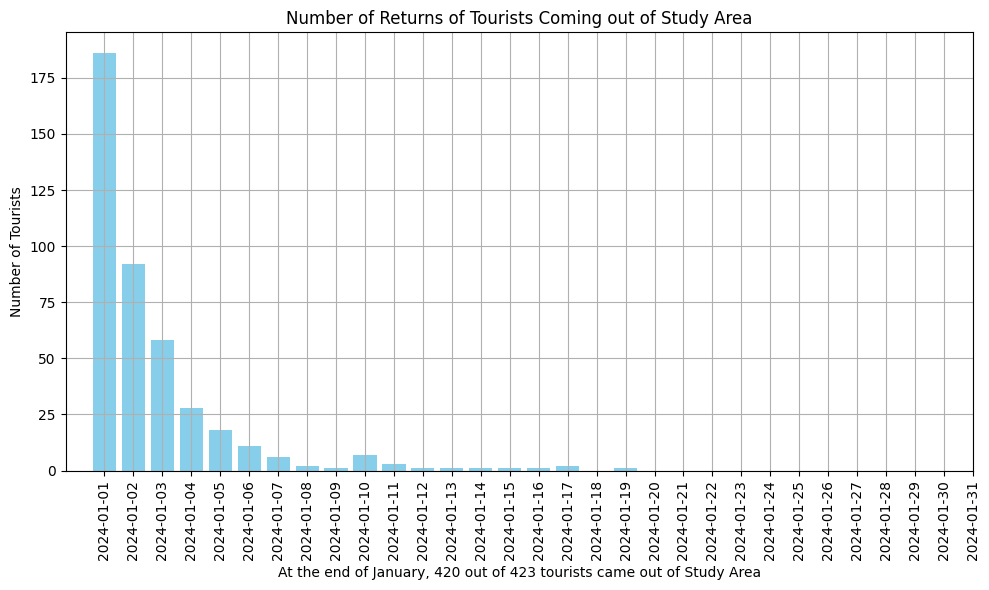

: 

In [79]:
import matplotlib.pyplot as plt


# Count number of returns per date
returns_by_date = df_filtered.groupby('returnedOn').size().reset_index(name='count')

## Sort by date
returns_by_date = returns_by_date.sort_values(by='returnedOn')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(returns_by_date['returnedOn'], returns_by_date['count'], color='skyblue')
plt.title('Number of Returns of Tourists Coming out of Study Area')
plt.xlabel('At the end of January, 420 out of 423 tourists came out of Study Area')
plt.ylabel('Number of Tourists')

# Set x-axis ticks to every date from 1 to 31
dates = pd.date_range(start='2024-01-01', end='2024-01-31')
plt.xticks(dates, dates.strftime('%Y-%m-%d'), rotation=90)  # Format dates as 'YYYY-MM-DD' and rotate for better readability



plt.grid()
plt.tight_layout()
plt.savefig('tourist_return_january.png')
plt.show()
